
📈 Resultados para: Regresión Logística
✅ Accuracy:        0.5264
✅ Precision:       0.4951
✅ Recall:          0.0210
✅ F1 Score:        0.0403
✅ AUC ROC:         0.5137
🔴 Hamming Loss:    0.4736
🔴 Jaccard Score:   0.0205
🔴 Matthews Corr:   0.0062


C:\Users\pedro\AppData\Local\Temp\ipykernel_2604\2807869959.py:77: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\pedro\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


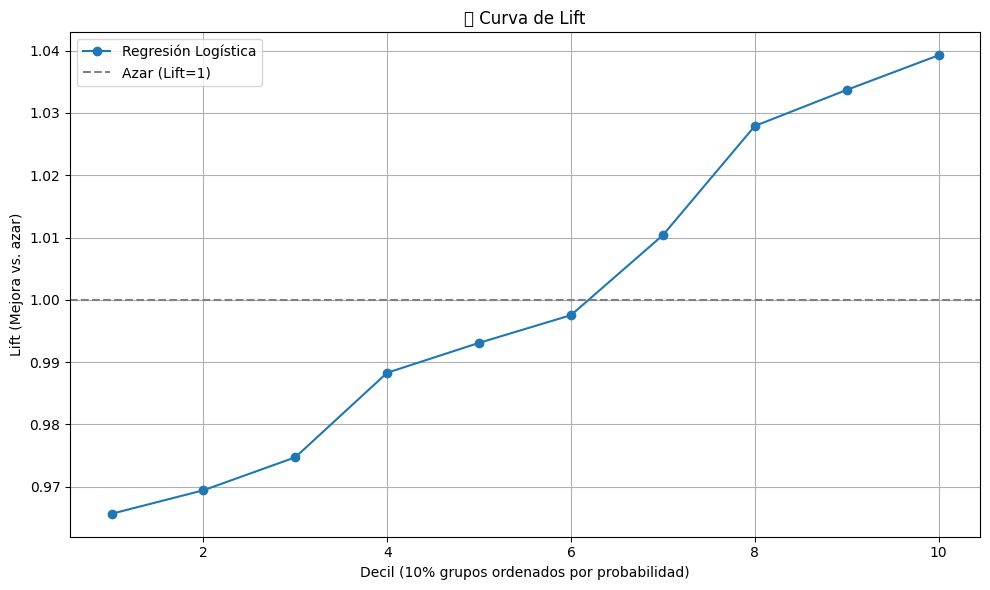


📈 Resultados para: Árbol de Decisión
✅ Accuracy:        0.5269
✅ Precision:       0.5020
✅ Recall:          0.0856
✅ F1 Score:        0.1463
✅ AUC ROC:         0.5305
🔴 Hamming Loss:    0.4731
🔴 Jaccard Score:   0.0789
🔴 Matthews Corr:   0.0170


C:\Users\pedro\AppData\Local\Temp\ipykernel_2604\2807869959.py:77: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\pedro\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


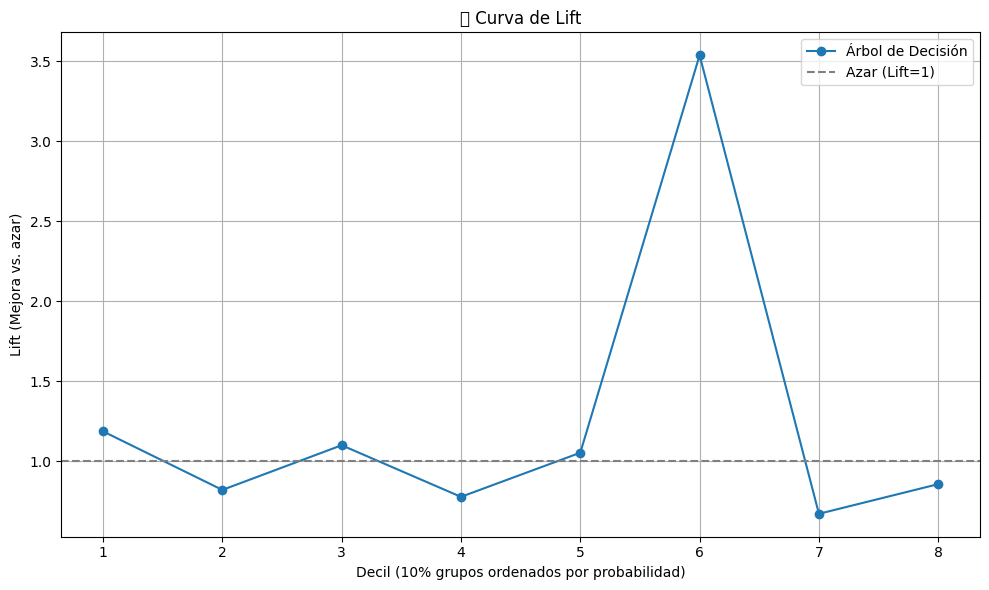


📈 Resultados para: Random Forest
✅ Accuracy:        0.5271
✅ Precision:       0.5039
✅ Recall:          0.0696
✅ F1 Score:        0.1224
✅ AUC ROC:         0.5309
🔴 Hamming Loss:    0.4729
🔴 Jaccard Score:   0.0652
🔴 Matthews Corr:   0.0162


C:\Users\pedro\AppData\Local\Temp\ipykernel_2604\2807869959.py:77: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\pedro\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


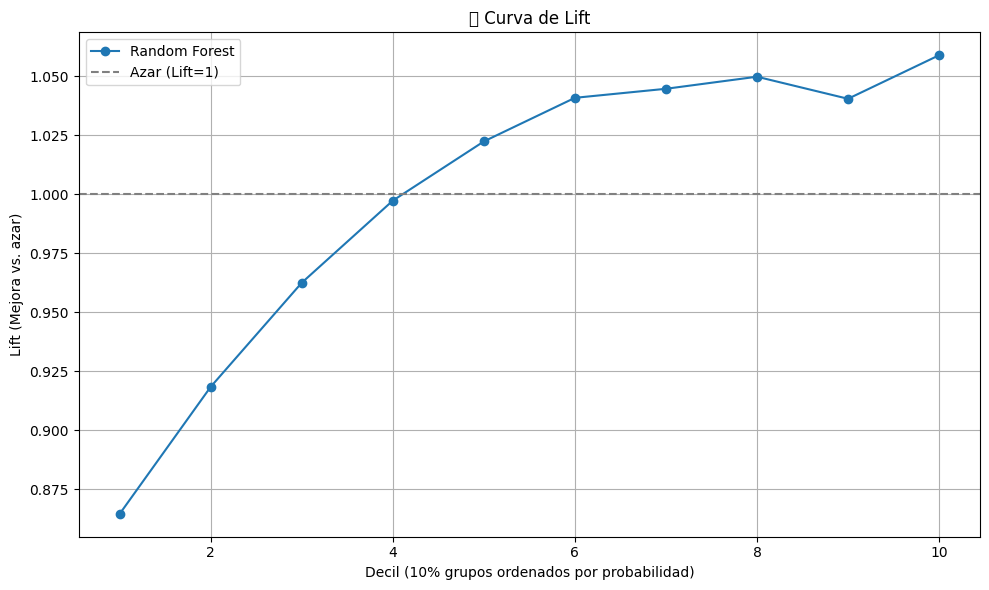


✅ Todos los modelos fueron entrenados y guardados en 'Projecto Integrador'.


In [1]:
#Entrenemiento modelos

import os
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, roc_auc_score,
    hamming_loss, jaccard_score, matthews_corrcoef
)
import joblib
import matplotlib.pyplot as plt


# 📂 Rutas personalizadas
RUTA_CSV = './Processed Data2/'
RUTA_MODELOS = './Modelos Entrenados/'

# 🏷️ Nombres de columnas
COLUMNAS = ['close', 'volume', 'sma20', 'rsi20', 'bbhigh', 'bblow', 'target']

# 📥 Cargar CSVs
def cargar_csvs(carpeta):
    archivos = [f for f in os.listdir(carpeta) if f.endswith('.csv')]
    df_list = []
    for archivo in archivos:
        ruta = os.path.join(carpeta, archivo)
        df = pd.read_csv(ruta)
        df_list.append(df)
    return pd.concat(df_list, ignore_index=True)

# 🧼 Preprocesamiento
def preprocesar_datos(df):
    df = df.dropna()
    df = df[df['target'].isin([0, 1])]
    X = df[COLUMNAS[:-1]]
    y = df['target']
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    return X_scaled, y, scaler

# 📊 Evaluar métricas
def evaluar_modelo(nombre, modelo, X_test, y_test):
    y_pred = modelo.predict(X_test)
    y_prob = modelo.predict_proba(X_test)[:, 1] if hasattr(modelo, "predict_proba") else y_pred

    print(f"\n📈 Resultados para: {nombre}")
    print(f"✅ Accuracy:        {accuracy_score(y_test, y_pred):.4f}")
    print(f"✅ Precision:       {precision_score(y_test, y_pred):.4f}")
    print(f"✅ Recall:          {recall_score(y_test, y_pred):.4f}")
    print(f"✅ F1 Score:        {f1_score(y_test, y_pred):.4f}")
    print(f"✅ AUC ROC:         {roc_auc_score(y_test, y_prob):.4f}")
    print(f"🔴 Hamming Loss:    {hamming_loss(y_test, y_pred):.4f}")
    print(f"🔴 Jaccard Score:   {jaccard_score(y_test, y_pred):.4f}")
    print(f"🔴 Matthews Corr:   {matthews_corrcoef(y_test, y_pred):.4f}")

def plot_lift_curve(y_true, y_proba, modelo_nombre='Modelo'):
    df_lift = pd.DataFrame({'y_true': y_true, 'y_proba': y_proba})
    df_lift = df_lift.sort_values(by='y_proba', ascending=False)
    df_lift['decile'] = pd.qcut(df_lift['y_proba'], 10, labels=False, duplicates='drop')

    total_positivos = df_lift['y_true'].sum()
    lift = df_lift.groupby('decile')['y_true'].sum() / (total_positivos / 10)

    plt.figure(figsize=(10, 6))
    plt.plot(np.arange(1, len(lift)+1), lift.values, marker='o', label=modelo_nombre)
    plt.axhline(1, color='gray', linestyle='--', label='Azar (Lift=1)')
    plt.title('📈 Curva de Lift')
    plt.xlabel('Decil (10% grupos ordenados por probabilidad)')
    plt.ylabel('Lift (Mejora vs. azar)')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# 💾 Guardar modelos
def guardar_modelo(modelo, scaler, nombre_modelo):
    os.makedirs(RUTA_MODELOS, exist_ok=True)
    ruta_modelo = os.path.join(RUTA_MODELOS, f'{nombre_modelo}.pkl')
    ruta_scaler = os.path.join(RUTA_MODELOS, f'{nombre_modelo}_scaler.pkl')
    joblib.dump(modelo, ruta_modelo)
    joblib.dump(scaler, ruta_scaler)

# 🚀 Main
def main():
    df_total = cargar_csvs(RUTA_CSV)
    X, y, scaler = preprocesar_datos(df_total)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # 🔹 Modelo 1: Regresión Logística
    log_model = LogisticRegression(max_iter=1000)
    log_model.fit(X_train, y_train)
    evaluar_modelo("Regresión Logística", log_model, X_test, y_test)
    guardar_modelo(log_model, scaler, "modelo_logistica")
    plot_lift_curve(y_test, log_model.predict_proba(X_test)[:, 1], 'Regresión Logística')
    plt.show()

    # 🔹 Modelo 2: Árbol de Decisión
    tree_model = DecisionTreeClassifier(max_depth=5, random_state=42)
    tree_model.fit(X_train, y_train)
    evaluar_modelo("Árbol de Decisión", tree_model, X_test, y_test)
    guardar_modelo(tree_model, scaler, "modelo_arbol")
    plot_lift_curve(y_test, tree_model.predict_proba(X_test)[:, 1], 'Árbol de Decisión')
    plt.show()

    # 🔹 Modelo 3: Random Forest
    rf_model = RandomForestClassifier(n_estimators=100, max_depth=7, random_state=42)
    rf_model.fit(X_train, y_train)
    evaluar_modelo("Random Forest", rf_model, X_test, y_test)
    guardar_modelo(rf_model, scaler, "modelo_rf")
    plot_lift_curve(y_test, rf_model.predict_proba(X_test)[:, 1], 'Random Forest')
    plt.show()

    # 🔹 Modelo 4: Gradient Boosting (opcional)

    print("\n✅ Todos los modelos fueron entrenados y guardados en 'Projecto Integrador'.")

if __name__ == "__main__":
    main()

